In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.ticker as mtick

# Conectar ao banco de dados
conn = sqlite3.connect(r'C:\Users\louis\datatech\Database\walmart_fraudes.db')

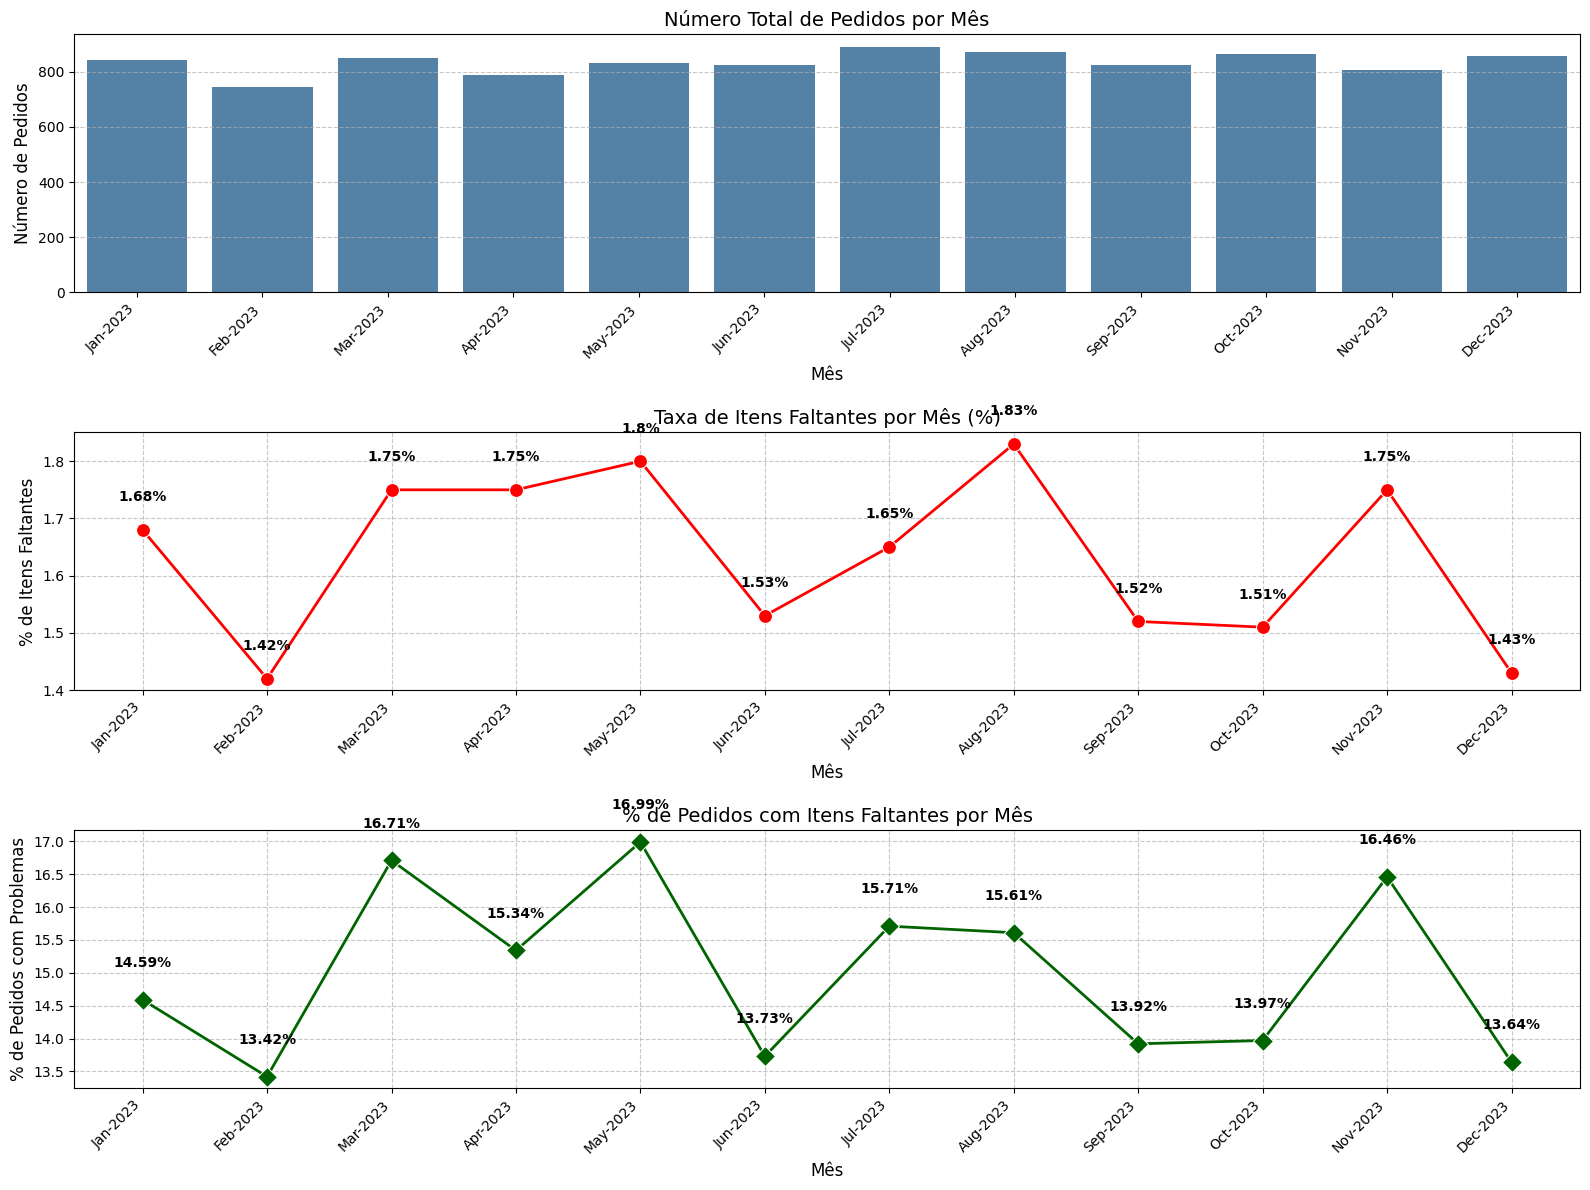

Evolução do Problema ao Longo do Tempo:
month_formatted  total_orders  total_missing_items  missing_rate  problem_order_percentage
       Jan-2023           843                  139          1.68                     14.59
       Feb-2023           745                  111          1.42                     13.42
       Mar-2023           850                  152          1.75                     16.71
       Apr-2023           789                  133          1.75                     15.34
       May-2023           830                  153          1.80                     16.99
       Jun-2023           823                  127          1.53                     13.73
       Jul-2023           891                  155          1.65                     15.71
       Aug-2023           871                  157          1.83                     15.61
       Sep-2023           826                  127          1.52                     13.92
       Oct-2023           866                  131

In [2]:
# Análise por mês
query_time = """
SELECT 
    strftime('%Y-%m', date) AS month,
    COUNT(order_id) AS total_orders,
    SUM(items_missing) AS total_missing_items,
    SUM(items_delivered) AS total_delivered_items,
    ROUND(SUM(items_missing) * 100.0 / (SUM(items_delivered) + SUM(items_missing)), 2) AS missing_rate,
    ROUND(COUNT(CASE WHEN items_missing > 0 THEN 1 END) * 100.0 / COUNT(order_id), 2) AS problem_order_percentage
FROM 
    orders
GROUP BY 
    strftime('%Y-%m', date)
ORDER BY 
    month
"""

time_df = pd.read_sql_query(query_time, conn)

# Converter mês para formato mais amigável
time_df['month_formatted'] = pd.to_datetime(time_df['month'] + '-01').dt.strftime('%b-%Y')

# Visualização
plt.figure(figsize=(16, 12))

# Gráfico 1: Número de pedidos por mês
plt.subplot(3, 1, 1)
sns.barplot(x='month_formatted', y='total_orders', data=time_df, color='steelblue')
plt.title('Número Total de Pedidos por Mês', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Taxa de itens faltantes ao longo do tempo
plt.subplot(3, 1, 2)
ax1 = sns.lineplot(x='month_formatted', y='missing_rate', data=time_df, marker='o', linewidth=2, markersize=10, color='red')
plt.title('Taxa de Itens Faltantes por Mês (%)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('% de Itens Faltantes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--', alpha=0.7)

# Adicionar valores nas linhas
for i, row in time_df.iterrows():
    ax1.text(i, row['missing_rate']+0.05, f"{row['missing_rate']}%", ha='center', fontweight='bold')

# Gráfico 3: Porcentagem de pedidos com problemas ao longo do tempo
plt.subplot(3, 1, 3)
ax2 = sns.lineplot(x='month_formatted', y='problem_order_percentage', data=time_df, marker='D', linewidth=2, markersize=10, color='darkgreen')
plt.title('% de Pedidos com Itens Faltantes por Mês', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('% de Pedidos com Problemas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--', alpha=0.7)

# Adicionar valores nas linhas
for i, row in time_df.iterrows():
    ax2.text(i, row['problem_order_percentage']+0.5, f"{row['problem_order_percentage']}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabela completa com estatísticas por mês
print("Evolução do Problema ao Longo do Tempo:")
print(time_df[['month_formatted', 'total_orders', 'total_missing_items', 'missing_rate', 'problem_order_percentage']].to_string(index=False))